# Import the Dataset

In [793]:
! pip install --upgrade pip
! pip install plotnine
!pip install kmodes
# Installation

ERROR: To modify pip, please run the following command:
C:\Users\prath\anaconda3\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 2.1/2.1 MB 153.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [796]:
## importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from plotnine import *
%matplotlib inline
import plotnine as plotnine
import seaborn as sns
from IPython.display import display, Latex
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from kmodes.kmodes import KModes

sns.set(rc={'figure.figsize':(4,4)})

In [797]:
## Reading the dataset

df=pd.read_csv(r"C:\Users\prath\Downloads\xxxxx")
df.head(5)

,lease_id,no_rent_change,rent_change_10,rent_change_20,lease_length_2,lease_length_3,lease_length_1,age_range_under_24,age_range_24_29,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60,NoFinesViolations,PositiveSurvey,LatePayments,HOA_mandatory,Renewed
0,HPA0001,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
1,HPA0002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HPA0003,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,HPA0004,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,HPA0005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# EDA & Analysis

In [798]:
## checking the  dataset size

a=len(df)
b=len(df.columns)

print("The number of rows/values in dataframe are {}".format(a))
print("The number of columns in dataframe are {}".format(b))

The number of rows/values in dataframe are 79850
The number of columns in dataframe are 18


In [799]:
# Inspect the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79850 entries, 0 to 79849
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lease_id            79850 non-null  object
 1   no_rent_change      79850 non-null  int64 
 2   rent_change_10      79850 non-null  int64 
 3   rent_change_20      79850 non-null  int64 
 4   lease_length_2      79850 non-null  int64 
 5   lease_length_3      79850 non-null  int64 
 6   lease_length_1      79850 non-null  int64 
 7   age_range_under_24  79850 non-null  int64 
 8   age_range_24_29     79850 non-null  int64 
 9   age_range_30_39     79850 non-null  int64 
 10  age_range_40_49     79850 non-null  int64 
 11  age_range_50_59     79850 non-null  int64 
 12  age_range_60        79850 non-null  int64 
 13  NoFinesViolations   79850 non-null  int64 
 14  PositiveSurvey      79850 non-null  int64 
 15  LatePayments        79850 non-null  int64 
 16  HOA_mandatory       79

### As all the values are in binary format (1, 0), I will convert the data from int64 to object type as it will help me to better interpret the graphical representation and also Python assumes it to be integer data which is not true in our case.

In [800]:
## Create a function to convert the data format from int64 to object type

def convert_int64_to_obj(args):
    return args.replace([0, 1], ['No', 'Yes'])

In [801]:
## Converting the data in dataframe

columns=list(df.columns)

for i in (columns):
    df[i]=convert_int64_to_obj(df[i])

In [802]:
# Checking the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79850 entries, 0 to 79849
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lease_id            79850 non-null  object
 1   no_rent_change      79850 non-null  object
 2   rent_change_10      79850 non-null  object
 3   rent_change_20      79850 non-null  object
 4   lease_length_2      79850 non-null  object
 5   lease_length_3      79850 non-null  object
 6   lease_length_1      79850 non-null  object
 7   age_range_under_24  79850 non-null  object
 8   age_range_24_29     79850 non-null  object
 9   age_range_30_39     79850 non-null  object
 10  age_range_40_49     79850 non-null  object
 11  age_range_50_59     79850 non-null  object
 12  age_range_60        79850 non-null  object
 13  NoFinesViolations   79850 non-null  object
 14  PositiveSurvey      79850 non-null  object
 15  LatePayments        79850 non-null  object
 16  HOA_mandatory       79

In [803]:
# Check the unique value each categorical columns
df.select_dtypes('object').nunique()

lease_id              79850
no_rent_change            2
rent_change_10            2
rent_change_20            2
lease_length_2            2
lease_length_3            2
lease_length_1            2
age_range_under_24        2
age_range_24_29           2
age_range_30_39           2
age_range_40_49           2
age_range_50_59           2
age_range_60              2
NoFinesViolations         2
PositiveSurvey            2
LatePayments              2
HOA_mandatory             2
Renewed                   2
dtype: int64

In [804]:
# Check missing value

df.isna().sum()

lease_id              0
no_rent_change        0
rent_change_10        0
rent_change_20        0
lease_length_2        0
lease_length_3        0
lease_length_1        0
age_range_under_24    0
age_range_24_29       0
age_range_30_39       0
age_range_40_49       0
age_range_50_59       0
age_range_60          0
NoFinesViolations     0
PositiveSurvey        0
LatePayments          0
HOA_mandatory         0
Renewed               0
dtype: int64

In [634]:
# Create A custom function to calculate the percenatge and value of yes/ no for each variable 

def calculate_percentage_yes_no(column,variable):
    df_renewal = pd.DataFrame(column.value_counts()).reset_index()
    df_renewal['Percentage'] = round(df_renewal[variable] / column.value_counts().sum()*100, 2)
    df_renewal.rename(columns = {'index':variable, variable:'Total'}, inplace = True)
    df_renewal = df_renewal.sort_values('Total', ascending = True).reset_index(drop =True)
    return df_renewal

In [635]:
df_renewal=calculate_percentage(df['Renewed'], 'Renewed')
df_renewal

,Renewed,Total,Percentage
0,Yes,15642,19.59
1,No,64208,80.41


### The ratio of customer who renewed the lease to who did not was 1:4. So, we can deduce that 4 in 5 person will leave the lease. Generally,  in marketing the cost required to acquire a new customer is greater than to retain the existing new customer. So we can look further into the main causes of such a high drop out of customer.

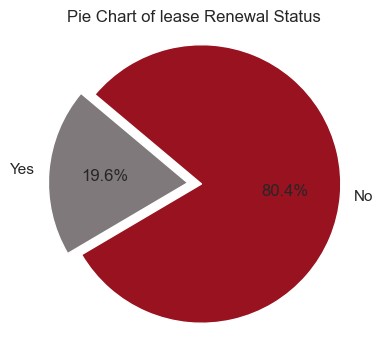

In [636]:
# Customize colors and other settings
colors = ['#80797c', '#981220']
explode = (0.1,0) # Explode 1st slice
# Create a pie chart
plt.pie(df_renewal['Total'], explode = explode, labels = df_renewal['Renewed'], 
        colors = colors, autopct = '%1.1f%%', shadow = False, startangle = 140)
# Add title
plt.title('Pie Chart of lease Renewal Status')
plt.axis('equal')
plt.show()

### What we will do now is to check the charateristic of each of the given column how they actually contribute to the lease renewal process.  

### 1) Checking for No Rent Change feature

In [637]:
# The composition of Renewal

calculate_percentage_yes_no(df['no_rent_change'], 'no_rent_change')

,no_rent_change,Total,Percentage
0,Yes,17681,22.14
1,No,62169,77.86


### 22 % of all customer  had no rent change.

<AxesSubplot:xlabel='no_rent_change', ylabel='count'>

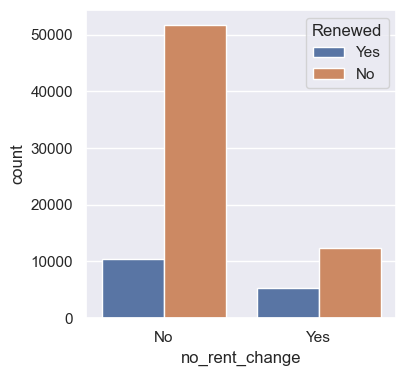

In [638]:
sns.countplot(data=df, x='no_rent_change', hue='Renewed')

### Calculating the conditional probability for each event:- 

In [707]:
def calculate_conditional_prob(df_column, column_value_yes, column_value_no):
    df_no_rent_change_cross_tab=pd.crosstab(df_column, df.Renewed, margins=True)
    print("The 2x2 contigency table is :-")
    print(df_no_rent_change_cross_tab)
    percentage_df=round((df_no_rent_change_cross_tab/79850)*100,2)
    a=int(df_no_rent_change_cross_tab.iloc[0,0])
    b=int(df_no_rent_change_cross_tab.iloc[1,0])
    c=int(df_no_rent_change_cross_tab.iloc[0,1])
    d=int(df_no_rent_change_cross_tab.iloc[1,1])
    
    p=int(df_no_rent_change_cross_tab.iloc[2,0])
    q=int(df_no_rent_change_cross_tab.iloc[2,1])
    
    u=round((a/p)*100,2)
    v=round((b/p)*100,2)
    w=round((c/q)*100,2)
    x=round((d/q)*100,2)
    print("\n")
    print("The 2x2 percentage table is :-")
    print(percentage_df)
    print("\n")
#     print(u)
    print("The prob values for Non Renewal:- ")
    print("The P(Non-Renewal / {}) is {} %".format(column_value_no,u))
#     print(v)
    print("The P(Non-Renewal / {}) is {} %".format(column_value_yes,v))
#     print(w)
    print("\n")
    print("The prob values for Renewal:- ")
    print("The P(Renewal / {}) is {} %".format(column_value_no,w))
#     print(x)
    print("The P(Renewal / {}) is {} %".format(column_value_yes,x))

In [708]:
calculate_conditional_prob(df.no_rent_change, "no_rent_change" ,"rent_change")

The 2x2 contigency table is :-
Renewed            No    Yes    All
no_rent_change                     
No              51797  10372  62169
Yes             12411   5270  17681
All             64208  15642  79850


The 2x2 percentage table is :-
Renewed            No    Yes     All
no_rent_change                      
No              64.87  12.99   77.86
Yes             15.54   6.60   22.14
All             80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / rent_change) is 80.67 %
The P(Non-Renewal / no_rent_change) is 19.33 %


The prob values for Renewal:- 
The P(Renewal / rent_change) is 66.31 %
The P(Renewal / no_rent_change) is 33.69 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 20 % chance of having no rent change while a customer who has renewed the lease has 34 % chance of having no rent change. Therefore, we can say that no rent change is not causing a major non-renewal or renewal.

### Similiarly, if we take complete population there is 15.54 % chance of the customer non likley to renew lease given no rent change. 
### Therefore, we can say that a customer will likely not renew the lease given no rent change. Therefore, we can infer that no rent change is a decractor.

### Now performing statistical test to check the if the given variable at all makes any significance to renewal or non renewal process.
### We perform the three test of independence to check if the two variable are independent of each other or not :-
#### 1) Chi squared test (approximate p value, better to perform using  monte caro simulation in R)
#### 2) Fisher's Exact test:-

### The Hypothesis for Chi squareed & Fisher's  test is as below:-

Ho=the variables are independent, there is no relationship between the two categorical variables

Ha=the variables are dependent

### Similiarly, we use G test for goodness of fit to check if given proportion of values hold true to main population or not. Basically, to say that our probability values will always hold true or not. 

### The Hypothesis for all three  test is as below:-

Ho=the given ratios (probability values) always hold true

Ha=the given ratios (probability values) will not hold true

In [641]:
def contigency_table_test(a):
    df_no_rent_change_cross_tab=pd.crosstab(a, df.Renewed, margins=True)
    print("The 2x2 contigency table is :-")
    print(df_no_rent_change_cross_tab)
    df_no_rent_change_cross_tab.columns=['No', 'Yes','row_totals']
    df_no_rent_change_cross_tab.index=['No', 'Yes','col_totals']
    observed=df_no_rent_change_cross_tab.iloc[0:2,0:2]
    expected=np.outer(df_no_rent_change_cross_tab['row_totals'][0:2],
                     df_no_rent_change_cross_tab.loc['col_totals'][0:2])/79850
    expected=pd.DataFrame(expected)
    expected.columns=['No', 'Yes']
    expected.index=['No', 'Yes']
    chi_squared_stat=(((observed-expected)**2)/expected).sum().sum()
    dof=(len(expected)-1)*(len(expected.columns)-1)
    crit=chi2.ppf(q=0.95,df=dof)
    p_value=1- chi2.cdf(x=chi_squared_stat, df=dof)
    res = chi2_contingency(observed, lambda_="log-likelihood")
    rest = fisher_exact(observed, alternative='two-sided')
    
    print("\n")
    print("The chi squared test stat:- ")
    print("The chi squared stat is = {}".format(chi_squared_stat))
    print("The critical Value is = {}".format(crit))
    print("The P-value is = {}".format(p_value))
    print("\n")
    print("The Fisher test stat:- ")
    p_valx=rest[1]
    print("The P-value for Fisher test is = {}".format(p_valx))
    
    print("\n")
    print("The G-test stat for goodness of fit:- ")
    p_val=res[1]
    print("The P-value for G test is = {}".format(p_val))

In [642]:
contigency_table_test(df.no_rent_change)

The 2x2 contigency table is :-
Renewed            No    Yes    All
no_rent_change                     
No              51797  10372  62169
Yes             12411   5270  17681
All             64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 1504.8876490872015
The critical Value is = 3.841458820694124
The P-value is = 0.0


The Fisher test stat:- 
The P-value for Fisher test is = 7.72757431573355e-306


The G-test stat for goodness of fit:- 
The P-value for G test is = 9.261319724516306e-306


### We can see that chi squared stat is higher than critical value but the p value is 0.0. Therefore, we cannot use Chi sqaured test and shift to fisher's exact test.
### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable no rent changed and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also had no rent change.

### 2) Checking for rent_change_10

In [709]:
# The composition of Renewal

calculate_percentage_yes_no(df['rent_change_10'], 'rent_change_10')

,rent_change_10,Total,Percentage
0,Yes,1879,2.35
1,No,77971,97.65


<AxesSubplot:xlabel='rent_change_10', ylabel='count'>

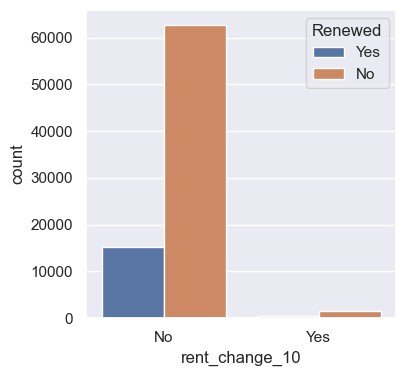

In [710]:
sns.countplot(data=df, x='rent_change_10', hue='Renewed')

In [711]:
calculate_conditional_prob(df.rent_change_10, 'rent_change_10' ,'no_rent_change')

The 2x2 contigency table is :-
Renewed            No    Yes    All
rent_change_10                     
No              62816  15155  77971
Yes              1392    487   1879
All             64208  15642  79850


The 2x2 percentage table is :-
Renewed            No    Yes     All
rent_change_10                      
No              78.67  18.98   97.65
Yes              1.74   0.61    2.35
All             80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / no_rent_change) is 97.83 %
The P(Non-Renewal / rent_change_10) is 2.17 %


The prob values for Renewal:- 
The P(Renewal / no_rent_change) is 96.89 %
The P(Renewal / rent_change_10) is 3.11 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 2 % chance of having rent increased by 10 % while a customer who has renewed the lease has 3 % chance of having rent increased by 10 %. Therefore, we can say that rent increased by 10 % is not causing a major non-renewal or renewal.

### Similiarly, if we take complete population there is 1.74 % chance of the customer non likley to renew lease given rent increased by 10 %. 
### Therefore, we can say that a customer will likely not renew the lease given rent increased by 10 %. Therefore, we can infer that rent increased by 10 % is a decractor.

In [712]:
contigency_table_test(df.rent_change_10)

The 2x2 contigency table is :-
Renewed            No    Yes    All
rent_change_10                     
No              62816  15155  77971
Yes              1392    487   1879
All             64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 48.930692575598414
The critical Value is = 3.841458820694124
The P-value is = 2.651656672014724e-12


The Fisher test stat:- 
The P-value for Fisher test is = 1.4395992043863767e-11


The G-test stat for goodness of fit:- 
The P-value for G test is = 1.7415260943653265e-11


### We can see that chi squared stat is higher than critical value  and the p value is less than 0.05. Therefore test is significant.

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable rent increased by 10% and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also had rent increased by 10%.

### 3) Checking for rent_change_20

In [713]:
# The composition of Renewal

calculate_percentage_yes_no(df['rent_change_20'], 'rent_change_20')

,rent_change_20,Total,Percentage
0,No,33388,41.81
1,Yes,46462,58.19


<AxesSubplot:xlabel='rent_change_20', ylabel='count'>

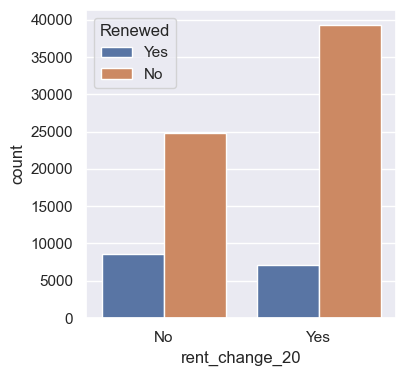

In [714]:
sns.countplot(data=df, x='rent_change_20', hue='Renewed')

In [716]:
calculate_conditional_prob(df.rent_change_20, 'rent_change_20' ,'no_rent_change')

The 2x2 contigency table is :-
Renewed            No    Yes    All
rent_change_20                     
No              24848   8540  33388
Yes             39360   7102  46462
All             64208  15642  79850


The 2x2 percentage table is :-
Renewed            No    Yes     All
rent_change_20                      
No              31.12  10.70   41.81
Yes             49.29   8.89   58.19
All             80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / no_rent_change) is 38.7 %
The P(Non-Renewal / rent_change_20) is 61.3 %


The prob values for Renewal:- 
The P(Renewal / no_rent_change) is 54.6 %
The P(Renewal / rent_change_20) is 45.4 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 61.3 % chance of having rent increased by 20 % while a customer who has renewed the lease has 45 % chance of having no rent increased by 20 %. Therefore, we can say that rent increased by 20 % is causing a major non-renewal.¶
### Similiarly, if we take complete population there is 49.29 % chance of the customer non likley to renew lease given rent increased by 20 %.
### Therefore, we can say that a customer will likely not renew the lease given rent increased by 20 %. Therefore, we can infer that rent increased by 20 % is a decractor.

In [718]:
contigency_table_test(df.rent_change_20)

The 2x2 contigency table is :-
Renewed            No    Yes    All
rent_change_20                     
No              24848   8540  33388
Yes             39360   7102  46462
All             64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 1306.5278738862546
The critical Value is = 3.841458820694124
The P-value is = 0.0


The Fisher test stat:- 
The P-value for Fisher test is = 1.577707373331742e-282


The G-test stat for goodness of fit:- 
The P-value for G test is = 1.7812648642943506e-282


### We can see that chi squared stat is higher than critical value  but the p value is greater than 0.

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable rent increased by 20% and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also had rent increased by 20%.

### 4) lease_length_1

In [719]:
# The composition of Renewal

calculate_percentage_yes_no(df['lease_length_1'], 'lease_length_1')

,lease_length_1,Total,Percentage
0,No,37940,47.51
1,Yes,41910,52.49


<AxesSubplot:xlabel='lease_length_1', ylabel='count'>

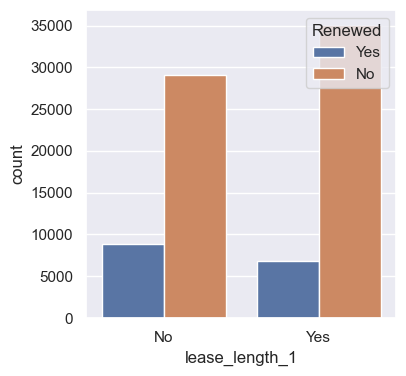

In [720]:
sns.countplot(data=df, x='lease_length_1', hue='Renewed')

In [721]:
calculate_conditional_prob(df.lease_length_1, 'lease_length_1' ,'Not first lease')

The 2x2 contigency table is :-
Renewed            No    Yes    All
lease_length_1                     
No              29088   8852  37940
Yes             35120   6790  41910
All             64208  15642  79850


The 2x2 percentage table is :-
Renewed            No    Yes     All
lease_length_1                      
No              36.43  11.09   47.51
Yes             43.98   8.50   52.49
All             80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / Not first lease) is 45.3 %
The P(Non-Renewal / lease_length_1) is 54.7 %


The prob values for Renewal:- 
The P(Renewal / Not first lease) is 56.59 %
The P(Renewal / lease_length_1) is 43.41 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 54.7 % chance of having first term on lease while a customer who has renewed the lease has 43 % chance of having  first term on lease . Therefore, we can say that  first term on lease  is causing a major non-renewal.¶
### Similiarly, if we take complete population there is 44 % chance of the customer non likley to renew lease given  first term on lease.
### Therefore, we can say that a customer will likely not renew the lease given  first term on lease. Therefore, we can infer that first term on lease is a decractor.

In [654]:
contigency_table_test(df.lease_length_1)

The 2x2 contigency table is :-
Renewed            No    Yes    All
lease_length_1                     
No              29088   8852  37940
Yes             35120   6790  41910
All             64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 642.7039427336928
The critical Value is = 3.841458820694124
The P-value is = 0.0


The Fisher test stat:- 
The P-value for Fisher test is = 9.318331164391831e-142


The G-test stat for goodness of fit:- 
The P-value for G test is = 1.1050680426766444e-141


### We can see that chi squared stat is higher than critical value  but the p value is greater than 0.

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable first term on lease and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also had first term on lease.

### 5) lease_lenth_2

In [722]:
# The composition of Renewal

calculate_percentage_yes_no(df['lease_length_2'], 'lease_length_2')

,lease_length_2,Total,Percentage
0,Yes,19577,24.52
1,No,60273,75.48


<AxesSubplot:xlabel='lease_length_2', ylabel='count'>

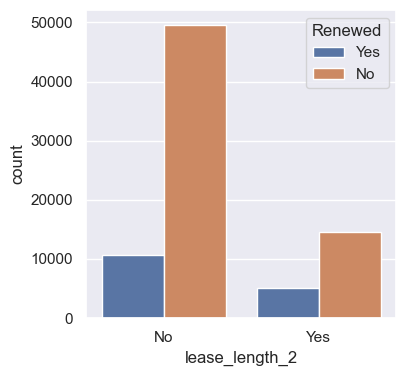

In [723]:
sns.countplot(data=df, x='lease_length_2', hue='Renewed')

In [724]:
calculate_conditional_prob(df.lease_length_2, 'lease_length_2' ,'Not second lease')

The 2x2 contigency table is :-
Renewed            No    Yes    All
lease_length_2                     
No              49636  10637  60273
Yes             14572   5005  19577
All             64208  15642  79850


The 2x2 percentage table is :-
Renewed            No    Yes     All
lease_length_2                      
No              62.16  13.32   75.48
Yes             18.25   6.27   24.52
All             80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / Not second lease) is 77.31 %
The P(Non-Renewal / lease_length_2) is 22.69 %


The prob values for Renewal:- 
The P(Renewal / Not second lease) is 68.0 %
The P(Renewal / lease_length_2) is 32.0 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 22.69 % chance of having seccond term on lease while a customer who has renewed the lease has 32 % chance of having  second term on lease . Therefore, we cannot say that  second term on lease  is causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 18 % chance of the customer non likley to renew lease given  second term on lease.
### Therefore, we can say that a customer will likely not renew the lease given second term on lease. Therefore, we can infer that second term on lease is a decractor.

In [725]:
contigency_table_test(df.lease_length_2)

The 2x2 contigency table is :-
Renewed            No    Yes    All
lease_length_2                     
No              49636  10637  60273
Yes             14572   5005  19577
All             64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 588.109705870307
The critical Value is = 3.841458820694124
The P-value is = 0.0


The Fisher test stat:- 
The P-value for Fisher test is = 2.6179910480023598e-124


The G-test stat for goodness of fit:- 
The P-value for G test is = 2.973059188083517e-124


### We can see that chi squared stat is higher than critical value  but the p value is not greater than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable second term on lease and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also had second term on lease.

### 5) lease_lenth_3

In [726]:
# The composition of Renewal

calculate_percentage_yes_no(df['lease_length_3'], 'lease_length_3')

,lease_length_3,Total,Percentage
0,Yes,4591,5.75
1,No,75259,94.25


<AxesSubplot:xlabel='lease_length_3', ylabel='count'>

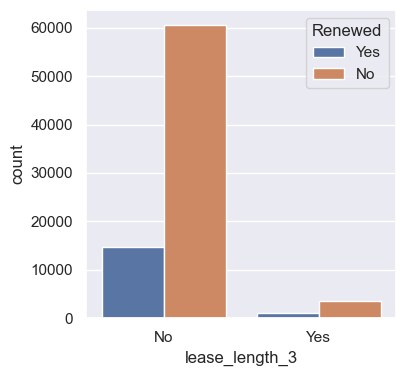

In [727]:
sns.countplot(data=df, x='lease_length_3', hue='Renewed')

In [728]:
calculate_conditional_prob(df.lease_length_3, 'lease_length_3' ,'Not third lease')

The 2x2 contigency table is :-
Renewed            No    Yes    All
lease_length_3                     
No              60655  14604  75259
Yes              3553   1038   4591
All             64208  15642  79850


The 2x2 percentage table is :-
Renewed            No    Yes     All
lease_length_3                      
No              75.96  18.29   94.25
Yes              4.45   1.30    5.75
All             80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / Not third lease) is 94.47 %
The P(Non-Renewal / lease_length_3) is 5.53 %


The prob values for Renewal:- 
The P(Renewal / Not third lease) is 93.36 %
The P(Renewal / lease_length_3) is 6.64 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 5.53 % chance of having third term on lease while a customer who has renewed the lease has 6.64 % chance of having  third term on lease . Therefore, we cannot say that third term on lease  is causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 4.45 % chance of the customer non likley to renew lease given  third term on lease.
### Therefore, we can say that a customer will likely not renew the lease given third term on lease. Therefore, we can infer that third term on lease is a detractor.

In [730]:
contigency_table_test(df.lease_length_3)

The 2x2 contigency table is :-
Renewed            No    Yes    All
lease_length_3                     
No              60655  14604  75259
Yes              3553   1038   4591
All             64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 28.207873269281187
The critical Value is = 3.841458820694124
The P-value is = 1.089604451109949e-07


The Fisher test stat:- 
The P-value for Fisher test is = 1.8596861724394292e-07


The G-test stat for goodness of fit:- 
The P-value for G test is = 1.9682635475700711e-07


### We can see that chi squared stat is higher than critical value  but the p value is greater than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable third term on lease and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also had third term on lease.

### 6) age_range_under_24 

In [731]:
# The composition of Renewal

calculate_percentage_yes_no(df['age_range_under_24'], 'age_range_under_24')

,age_range_under_24,Total,Percentage
0,Yes,3059,3.83
1,No,76791,96.17


<AxesSubplot:xlabel='age_range_under_24', ylabel='count'>

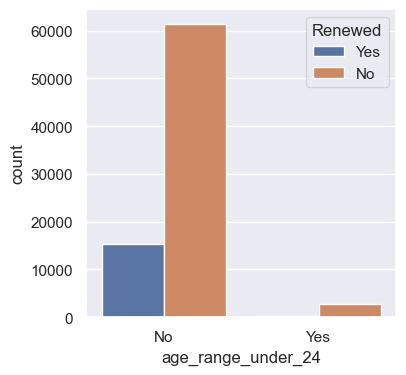

In [732]:
sns.countplot(data=df, x='age_range_under_24', hue='Renewed')

In [733]:
calculate_conditional_prob(df.age_range_under_24, 'age_range_under_24' ,'Age not under 24')

The 2x2 contigency table is :-
Renewed                No    Yes    All
age_range_under_24                     
No                  61435  15356  76791
Yes                  2773    286   3059
All                 64208  15642  79850


The 2x2 percentage table is :-
Renewed                No    Yes     All
age_range_under_24                      
No                  76.94  19.23   96.17
Yes                  3.47   0.36    3.83
All                 80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / Age not under 24) is 95.68 %
The P(Non-Renewal / age_range_under_24) is 4.32 %


The prob values for Renewal:- 
The P(Renewal / Age not under 24) is 98.17 %
The P(Renewal / age_range_under_24) is 1.83 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 4.32 % chance of having age under 24 while a customer who has renewed the lease has 1.83 % chance of having  having age under 24. Therefore, we cannot say that third term on lease  is causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 3.47 % chance of the customer non likley to renew lease given having age under 24 .
### Therefore, we can say that a customer will likely not renew the lease given having age under 24 . Therefore, we can infer that having age under 24  is a detractor.

In [735]:
contigency_table_test(df.age_range_under_24)

The 2x2 contigency table is :-
Renewed                No    Yes    All
age_range_under_24                     
No                  61435  15356  76791
Yes                  2773    286   3059
All                 64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 211.73508470787507
The critical Value is = 3.841458820694124
The P-value is = 0.0


The Fisher test stat:- 
The P-value for Fisher test is = 4.32451125183028e-56


The G-test stat for goodness of fit:- 
The P-value for G test is = 4.594732829449638e-56


### We can see that chi squared stat is higher than critical value  but the p value is greater than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable having age under 24 and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also having age under 24.

### 7) age_range_24_29 

In [736]:
# The composition of Renewal

calculate_percentage_yes_no(df['age_range_24_29'], 'age_range_24_29')

,age_range_24_29,Total,Percentage
0,Yes,7342,9.19
1,No,72508,90.81


<AxesSubplot:xlabel='age_range_24_29', ylabel='count'>

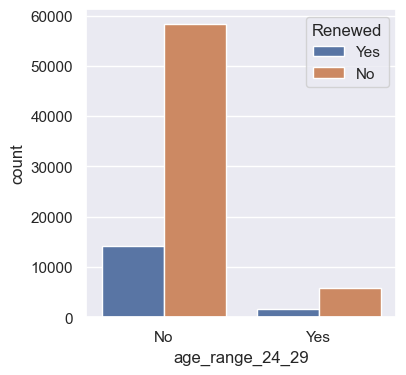

In [737]:
sns.countplot(data=df, x='age_range_24_29', hue='Renewed')

In [738]:
calculate_conditional_prob(df.age_range_24_29, 'age_range_24_29' ,'Age not between 24 and 29')

The 2x2 contigency table is :-
Renewed             No    Yes    All
age_range_24_29                     
No               58371  14137  72508
Yes               5837   1505   7342
All              64208  15642  79850


The 2x2 percentage table is :-
Renewed             No    Yes     All
age_range_24_29                      
No               73.10  17.70   90.81
Yes               7.31   1.88    9.19
All              80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / Age not between 24 and 29) is 90.91 %
The P(Non-Renewal / age_range_24_29) is 9.09 %


The prob values for Renewal:- 
The P(Renewal / Age not between 24 and 29) is 90.38 %
The P(Renewal / age_range_24_29) is 9.62 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 9 % chance of having age between 24 and 29 while a customer who has renewed the lease has 9.96 % chance of having  having age between 24 and 29. Therefore, we cannot say that age between 24 and 29  is not causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 7.31 % chance of customer non likley to renew lease given having age between 24 and 29 .
### Therefore, we can say that a customer will likely not renew the lease given having age between 24 and 29 . Therefore, we can infer that having age between 24 and 29  is a detractor.

In [739]:
contigency_table_test(df.age_range_24_29)

The 2x2 contigency table is :-
Renewed             No    Yes    All
age_range_24_29                     
No               58371  14137  72508
Yes               5837   1505   7342
All              64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 4.2438438244620205
The critical Value is = 3.841458820694124
The P-value is = 0.039392883620772645


The Fisher test stat:- 
The P-value for Fisher test is = 0.0401592701243967


The G-test stat for goodness of fit:- 
The P-value for G test is = 0.041932209703278586


### We can see that chi squared stat is higher than critical value  but the p value is greater than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable having age between 24 and 29 and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also having age between 24 and 29.

### 8) age_range_30_39

In [740]:
# The composition of Renewal

calculate_percentage_yes_no(df['age_range_30_39'], 'age_range_30_39')

,age_range_30_39,Total,Percentage
0,Yes,11913,14.92
1,No,67937,85.08


<AxesSubplot:xlabel='age_range_30_39', ylabel='count'>

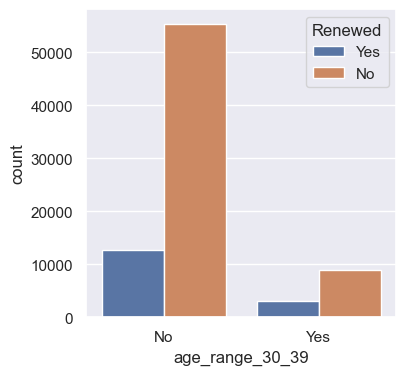

In [741]:
sns.countplot(data=df, x='age_range_30_39', hue='Renewed')

In [742]:
calculate_conditional_prob(df.age_range_30_39, 'age_range_30_39' ,'Age not between 30 and 39')

The 2x2 contigency table is :-
Renewed             No    Yes    All
age_range_30_39                     
No               55366  12571  67937
Yes               8842   3071  11913
All              64208  15642  79850


The 2x2 percentage table is :-
Renewed             No    Yes     All
age_range_30_39                      
No               69.34  15.74   85.08
Yes              11.07   3.85   14.92
All              80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / Age not between 30 and 39) is 86.23 %
The P(Non-Renewal / age_range_30_39) is 13.77 %


The prob values for Renewal:- 
The P(Renewal / Age not between 30 and 39) is 80.37 %
The P(Renewal / age_range_30_39) is 19.63 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 14 % chance of having age between 30 and 39 while a customer who has renewed the lease has 20 % chance of having  having age between 30 and 39. Therefore, we cannot say that age between 30 and 39  is not causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 11.07 % chance of customer non likley to renew lease given having age between 30 and 39 .
### Therefore, we can say that a customer will likely not renew the lease given having age between 30 and 39 . Therefore, we can infer that having age between 30 and 39  is a detractor.

In [743]:
contigency_table_test(df.age_range_30_39)

The 2x2 contigency table is :-
Renewed             No    Yes    All
age_range_30_39                     
No               55366  12571  67937
Yes               8842   3071  11913
All              64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 340.52232692570897
The critical Value is = 3.841458820694124
The P-value is = 0.0


The Fisher test stat:- 
The P-value for Fisher test is = 6.443970037096112e-72


The G-test stat for goodness of fit:- 
The P-value for G test is = 8.443205772703889e-72


### We can see that chi squared stat is higher than critical value  but the p value is greater than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable having age between 30 and 39 and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also having age between 30 and 39.

### 9) age_range_40_49

In [744]:
# The composition of Renewal

calculate_percentage_yes_no(df['age_range_40_49'], 'age_range_40_49')

,age_range_40_49,Total,Percentage
0,Yes,8672,10.86
1,No,71178,89.14


<AxesSubplot:xlabel='age_range_40_49', ylabel='count'>

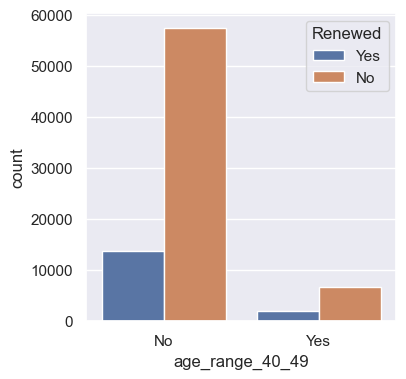

In [745]:
sns.countplot(data=df, x='age_range_40_49', hue='Renewed')

In [746]:
calculate_conditional_prob(df.age_range_40_49, 'age_range_40_49' ,'Age not between 40 and 49')

The 2x2 contigency table is :-
Renewed             No    Yes    All
age_range_40_49                     
No               57491  13687  71178
Yes               6717   1955   8672
All              64208  15642  79850


The 2x2 percentage table is :-
Renewed             No    Yes     All
age_range_40_49                      
No               72.00  17.14   89.14
Yes               8.41   2.45   10.86
All              80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / Age not between 40 and 49) is 89.54 %
The P(Non-Renewal / age_range_40_49) is 10.46 %


The prob values for Renewal:- 
The P(Renewal / Age not between 40 and 49) is 87.5 %
The P(Renewal / age_range_40_49) is 12.5 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 11 % chance of having age between 40 and 49 while a customer who has renewed the lease has 12.5 % chance of having  having age between 40 and 49. Therefore, we cannot say that age between 40 and 49  is not causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 8.41 % chance of customer non likley to renew lease given having age between 40 and 49 .
### Therefore, we can say that a customer will likely not renew the lease given having age between 40 and 49 . Therefore, we can infer that having age between 40 and 49  is a detractor.

In [747]:
contigency_table_test(df.age_range_40_49)

The 2x2 contigency table is :-
Renewed             No    Yes    All
age_range_40_49                     
No               57491  13687  71178
Yes               6717   1955   8672
All              64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 53.91518397498539
The critical Value is = 3.841458820694124
The P-value is = 2.0938806244430452e-13


The Fisher test stat:- 
The P-value for Fisher test is = 4.958418764216942e-13


The G-test stat for goodness of fit:- 
The P-value for G test is = 5.408141402997058e-13


### We can see that chi squared stat is higher than critical value  but the p value is greater than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable having age between 40 and 49 and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also having age between 40 and 49.

### 9) age_range_50_59

In [748]:
# The composition of Renewal

calculate_percentage_yes_no(df['age_range_50_59'], 'age_range_50_59')

,age_range_50_59,Total,Percentage
0,Yes,4722,5.91
1,No,75128,94.09


<AxesSubplot:xlabel='age_range_50_59', ylabel='count'>

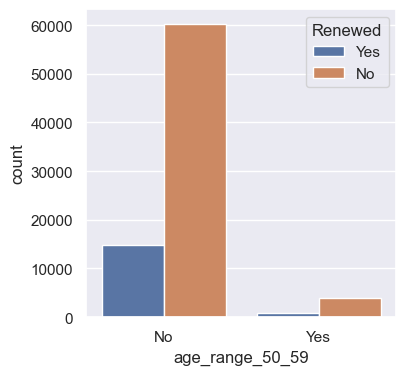

In [749]:
sns.countplot(data=df, x='age_range_50_59', hue='Renewed')

In [750]:
calculate_conditional_prob(df.age_range_50_59, 'age_range_50_59' ,'Age not between 50 and 59')

The 2x2 contigency table is :-
Renewed             No    Yes    All
age_range_50_59                     
No               60311  14817  75128
Yes               3897    825   4722
All              64208  15642  79850


The 2x2 percentage table is :-
Renewed             No    Yes     All
age_range_50_59                      
No               75.53  18.56   94.09
Yes               4.88   1.03    5.91
All              80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / Age not between 50 and 59) is 93.93 %
The P(Non-Renewal / age_range_50_59) is 6.07 %


The prob values for Renewal:- 
The P(Renewal / Age not between 50 and 59) is 94.73 %
The P(Renewal / age_range_50_59) is 5.27 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 6.07 % chance of having age between 50 and 59 while a customer who has renewed the lease has  5.27 % chance of having  having age between 50 and 59. Therefore, we cannot say that age between 50 and 59  is not causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 5 % chance of customer non likley to renew lease given having age between 40 and 49 .
### Therefore, we can say that a customer will likely not renew the lease given having age between 50 and 59 . Therefore, we can infer that having age between 50 and 59  is a detractor.

In [751]:
contigency_table_test(df.age_range_50_59)

The 2x2 contigency table is :-
Renewed             No    Yes    All
age_range_50_59                     
No               60311  14817  75128
Yes               3897    825   4722
All              64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 14.29043114533602
The critical Value is = 3.841458820694124
The P-value is = 0.00015665922252106057


The Fisher test stat:- 
The P-value for Fisher test is = 0.00013413015859267094


The G-test stat for goodness of fit:- 
The P-value for G test is = 0.00013795521745182327


### We can see that chi squared stat is higher than critical value  but the p value is greater than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable having age between 50 and 59 and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also having age between 50 and 59.

### 10) age_range_60

In [752]:
# The composition of Renewal

calculate_percentage_yes_no(df['age_range_60'], 'age_range_60')

,age_range_60,Total,Percentage
0,Yes,1675,2.1
1,No,78175,97.9


<AxesSubplot:xlabel='age_range_60', ylabel='count'>

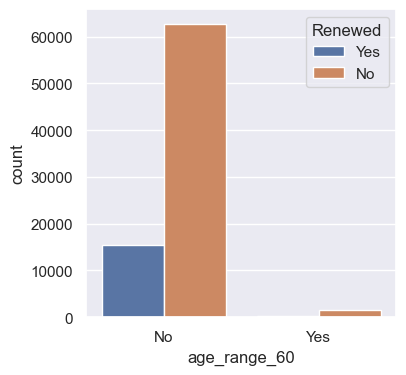

In [753]:
sns.countplot(data=df, x='age_range_60', hue='Renewed')

In [754]:
calculate_conditional_prob(df.age_range_60, 'age_range_60' ,'age not above 60')

The 2x2 contigency table is :-
Renewed          No    Yes    All
age_range_60                     
No            62752  15423  78175
Yes            1456    219   1675
All           64208  15642  79850


The 2x2 percentage table is :-
Renewed          No    Yes    All
age_range_60                     
No            78.59  19.31   97.9
Yes            1.82   0.27    2.1
All           80.41  19.59  100.0


The prob values for Non Renewal:- 
The P(Non-Renewal / age not above 60) is 97.73 %
The P(Non-Renewal / age_range_60) is 2.27 %


The prob values for Renewal:- 
The P(Renewal / age not above 60) is 98.6 %
The P(Renewal / age_range_60) is 1.4 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 3 % chance of having age above 60 while a customer who has renewed the lease has  2 % chance of having  having age between 50 and 59. Therefore, we cannot say that having age above 60  is not causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 2 % chance of customer non likley to renew lease given having age above 60.
### Therefore, we can say that a customer will likely not renew the lease given having age between 50 and 59 . Therefore, we can infer that having age above 60  is a detractor.

In [755]:
contigency_table_test(df.age_range_60)

The 2x2 contigency table is :-
Renewed          No    Yes    All
age_range_60                     
No            62752  15423  78175
Yes            1456    219   1675
All           64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 46.0963099210536
The critical Value is = 3.841458820694124
The P-value is = 1.1257994536606475e-11


The Fisher test stat:- 
The P-value for Fisher test is = 1.3809432015796813e-12


The G-test stat for goodness of fit:- 
The P-value for G test is = 1.3608347883815523e-12


### We can see that chi squared stat is higher than critical value  but the p value is greater than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable having age above 60 and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also having age above 60.

### 12) NoFinesViolations

In [756]:
# The composition of Renewal

calculate_percentage_yes_no(df['NoFinesViolations'], 'NoFinesViolations')

,NoFinesViolations,Total,Percentage
0,Yes,11119,13.92
1,No,68731,86.08


<AxesSubplot:xlabel='NoFinesViolations', ylabel='count'>

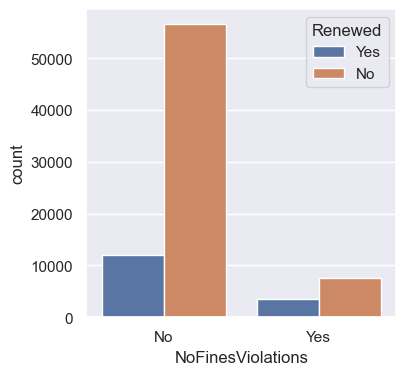

In [757]:
sns.countplot(data=df, x='NoFinesViolations', hue='Renewed')

In [758]:
calculate_conditional_prob(df.NoFinesViolations, 'NoFinesViolations' ,'Fines Violations')

The 2x2 contigency table is :-
Renewed               No    Yes    All
NoFinesViolations                     
No                 56681  12050  68731
Yes                 7527   3592  11119
All                64208  15642  79850


The 2x2 percentage table is :-
Renewed               No    Yes     All
NoFinesViolations                      
No                 70.98  15.09   86.08
Yes                 9.43   4.50   13.92
All                80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / Fines Violations) is 88.28 %
The P(Non-Renewal / NoFinesViolations) is 11.72 %


The prob values for Renewal:- 
The P(Renewal / Fines Violations) is 77.04 %
The P(Renewal / NoFinesViolations) is 22.96 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 12 % chance of having no fines violated while a customer who has renewed the lease has  23 % chance of having  having no fines violated. Therefore, we cannot say that having no fines violated  is not causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 9 % chance of customer non likley to renew lease given having no fines violated.
### Therefore, we can say that a customer will likely not renew the lease given having no fines violated . Therefore, we can infer that having no fines violated  is a detractor.

In [760]:
contigency_table_test(df.NoFinesViolations)

The 2x2 contigency table is :-
Renewed               No    Yes    All
NoFinesViolations                     
No                 56681  12050  68731
Yes                 7527   3592  11119
All                64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 1326.007795016176
The critical Value is = 3.841458820694124
The P-value is = 0.0


The Fisher test stat:- 
The P-value for Fisher test is = 2.9534892666304953e-261


The G-test stat for goodness of fit:- 
The P-value for G test is = 4.450605765766287e-261


### We can see that chi squared stat is higher than critical value  but the p value is greater than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable having no fines violated and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also having no fines violated.

### 13) PositiveSurvey

In [761]:
# The composition of Renewal

calculate_percentage_yes_no(df['PositiveSurvey'], 'PositiveSurvey')

,PositiveSurvey,Total,Percentage
0,Yes,21491,26.91
1,No,58359,73.09


<AxesSubplot:xlabel='PositiveSurvey', ylabel='count'>

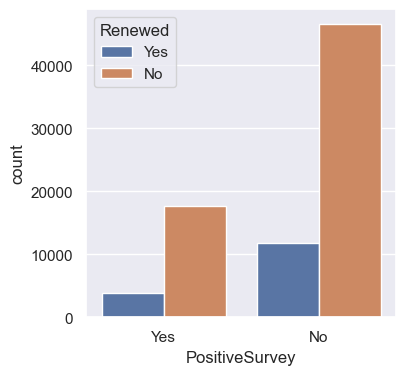

In [762]:
sns.countplot(data=df, x='PositiveSurvey', hue='Renewed')

In [763]:
calculate_conditional_prob(df.PositiveSurvey, 'PositiveSurvey' ,'No Positive Survey')

The 2x2 contigency table is :-
Renewed            No    Yes    All
PositiveSurvey                     
No              46592  11767  58359
Yes             17616   3875  21491
All             64208  15642  79850


The 2x2 percentage table is :-
Renewed            No    Yes     All
PositiveSurvey                      
No              58.35  14.74   73.09
Yes             22.06   4.85   26.91
All             80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / No Positive Survey) is 72.56 %
The P(Non-Renewal / PositiveSurvey) is 27.44 %


The prob values for Renewal:- 
The P(Renewal / No Positive Survey) is 75.23 %
The P(Renewal / PositiveSurvey) is 24.77 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 27 % chance of having provided positive feedback on survey while a customer who has renewed the lease has  25% chance of having  provided positive feedback on survey. Therefore, we cannot say that having provided positive feedback on survey  is not causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 22 % chance of customer non likley to renew lease given having provided positive feedback on survey.
### Therefore, we can say that a customer will likely not renew the lease given having provided positive feedback on survey. Therefore, we can infer that provided positive feedback on survey violated  is a detractor.

In [765]:
contigency_table_test(df.PositiveSurvey)

The 2x2 contigency table is :-
Renewed            No    Yes    All
PositiveSurvey                     
No              46592  11767  58359
Yes             17616   3875  21491
All             64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 45.33823503369563
The critical Value is = 3.841458820694124
The P-value is = 1.6578072248307762e-11


The Fisher test stat:- 
The P-value for Fisher test is = 1.3179405809452632e-11


The G-test stat for goodness of fit:- 
The P-value for G test is = 1.3056021390097887e-11


### We can see that chi squared stat is higher than critical value  but the p value is less than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable having provided positive feedback on survey and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also having provided positive feedback on survey.

### 13) LatePayments

In [766]:
# The composition of Renewal

calculate_percentage_yes_no(df['LatePayments'], 'LatePayments')

,LatePayments,Total,Percentage
0,No,34623,43.36
1,Yes,45227,56.64


<AxesSubplot:xlabel='LatePayments', ylabel='count'>

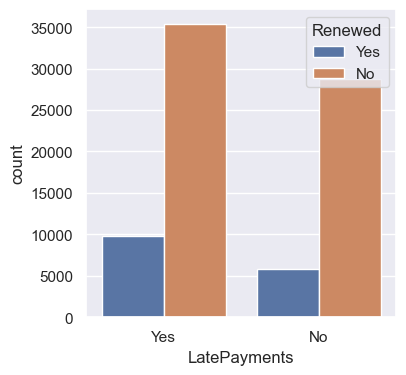

In [767]:
sns.countplot(data=df, x='LatePayments', hue='Renewed')

In [768]:
calculate_conditional_prob(df.LatePayments, 'LatePayments' ,'No Late Payments')

The 2x2 contigency table is :-
Renewed          No    Yes    All
LatePayments                     
No            28802   5821  34623
Yes           35406   9821  45227
All           64208  15642  79850


The 2x2 percentage table is :-
Renewed          No    Yes     All
LatePayments                      
No            36.07   7.29   43.36
Yes           44.34  12.30   56.64
All           80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / No Late Payments) is 44.86 %
The P(Non-Renewal / LatePayments) is 55.14 %


The prob values for Renewal:- 
The P(Renewal / No Late Payments) is 37.21 %
The P(Renewal / LatePayments) is 62.79 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 55 % chance of never been late on making payments while a customer who has renewed the lease has  62 % chance of never been late on making payments. Therefore, we cannot say that never been late on making payments  is not causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 44 % chance of customer non likley to renew lease given never been late on making payments.
### Therefore, we can say that a customer will likely not renew the lease given having never been late on making payments. Therefore, we can infer that never been late on making payments  is a detractor.

In [770]:
contigency_table_test(df.LatePayments)

The 2x2 contigency table is :-
Renewed          No    Yes    All
LatePayments                     
No            28802   5821  34623
Yes           35406   9821  45227
All           64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 299.20590173696974
The critical Value is = 3.841458820694124
The P-value is = 0.0


The Fisher test stat:- 
The P-value for Fisher test is = 1.1375683928036668e-67


The G-test stat for goodness of fit:- 
The P-value for G test is = 1.1502796033647747e-67


### We can see that chi squared stat is higher than critical value  but the p value is less than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable having never been late on making payments and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also never been late on making payments.

### 14) HOA_mandatory

In [771]:
# The composition of Renewal

calculate_percentage_yes_no(df['HOA_mandatory'], 'HOA_mandatory')

,HOA_mandatory,Total,Percentage
0,Yes,13106,16.41
1,No,66744,83.59


<AxesSubplot:xlabel='HOA_mandatory', ylabel='count'>

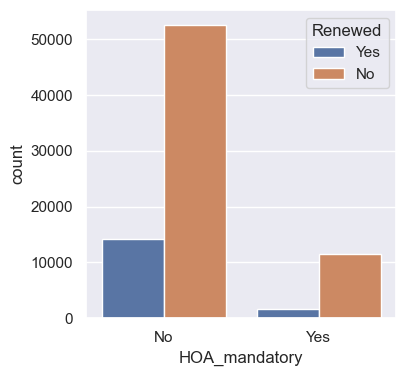

In [772]:
sns.countplot(data=df, x='HOA_mandatory', hue='Renewed')

In [773]:
calculate_conditional_prob(df.HOA_mandatory, 'HOA_mandatory' ,'No HOA mandatory')

The 2x2 contigency table is :-
Renewed           No    Yes    All
HOA_mandatory                     
No             52654  14090  66744
Yes            11554   1552  13106
All            64208  15642  79850


The 2x2 percentage table is :-
Renewed           No    Yes     All
HOA_mandatory                      
No             65.94  17.65   83.59
Yes            14.47   1.94   16.41
All            80.41  19.59  100.00


The prob values for Non Renewal:- 
The P(Non-Renewal / No HOA mandatory) is 82.01 %
The P(Non-Renewal / HOA_mandatory) is 17.99 %


The prob values for Renewal:- 
The P(Renewal / No HOA mandatory) is 90.08 %
The P(Renewal / HOA_mandatory) is 9.92 %


### Using, above graphs & conditional probability we can say that a customer who had not renewed the lease has 18 % chance of having mandatory HOA fees on lease while a customer who has renewed the lease has  10 % chance of having mandatory HOA fees on lease. Therefore, we cannot say that never been late on making payments  is not causing a major non-renewal or renewal.¶
### Similiarly, if we take complete population there is 15 % chance of customer non likley to renew lease given mandatory HOA fees on lease.
### Therefore, we can say that a customer will likely not renew the lease given mandatory HOA fees on lease. Therefore, we can infer that mandatory HOA fees on lease  is a detractor.

In [774]:
contigency_table_test(df.HOA_mandatory)

The 2x2 contigency table is :-
Renewed           No    Yes    All
HOA_mandatory                     
No             52654  14090  66744
Yes            11554   1552  13106
All            64208  15642  79850


The chi squared test stat:- 
The chi squared stat is = 597.4545295152955
The critical Value is = 3.841458820694124
The P-value is = 0.0


The Fisher test stat:- 
The P-value for Fisher test is = 2.5166067004741373e-145


The G-test stat for goodness of fit:- 
The P-value for G test is = 2.8162928716221965e-145


### We can see that chi squared stat is higher than critical value  but the p value is less than 0.05

### The p value for fisher's test is less than 0.05 therefore we can say that there is significant relationship between the  variable mandatory HOA fees on lease and Lease renewal.

### The p value for G test is less than 0.05, therefore we can say that this calculated ratios will not always be true. Therefore, we cannot be certain that a customer who did not renew lease also had mandatory HOA fees on lease.

## Analysis of Detractors:-

### Given all of the variables will act as detractor (although will not always hold true !!) or not be conducive in renewal process based on given sample of data. We can further check the proportion of the detractor in comparison and how likely some of the detractor will occur as compared to other. This, can significantly help us to take key decision regarding customer behavior.

<AxesSubplot:xlabel='Variable', ylabel='Population Percenatge'>

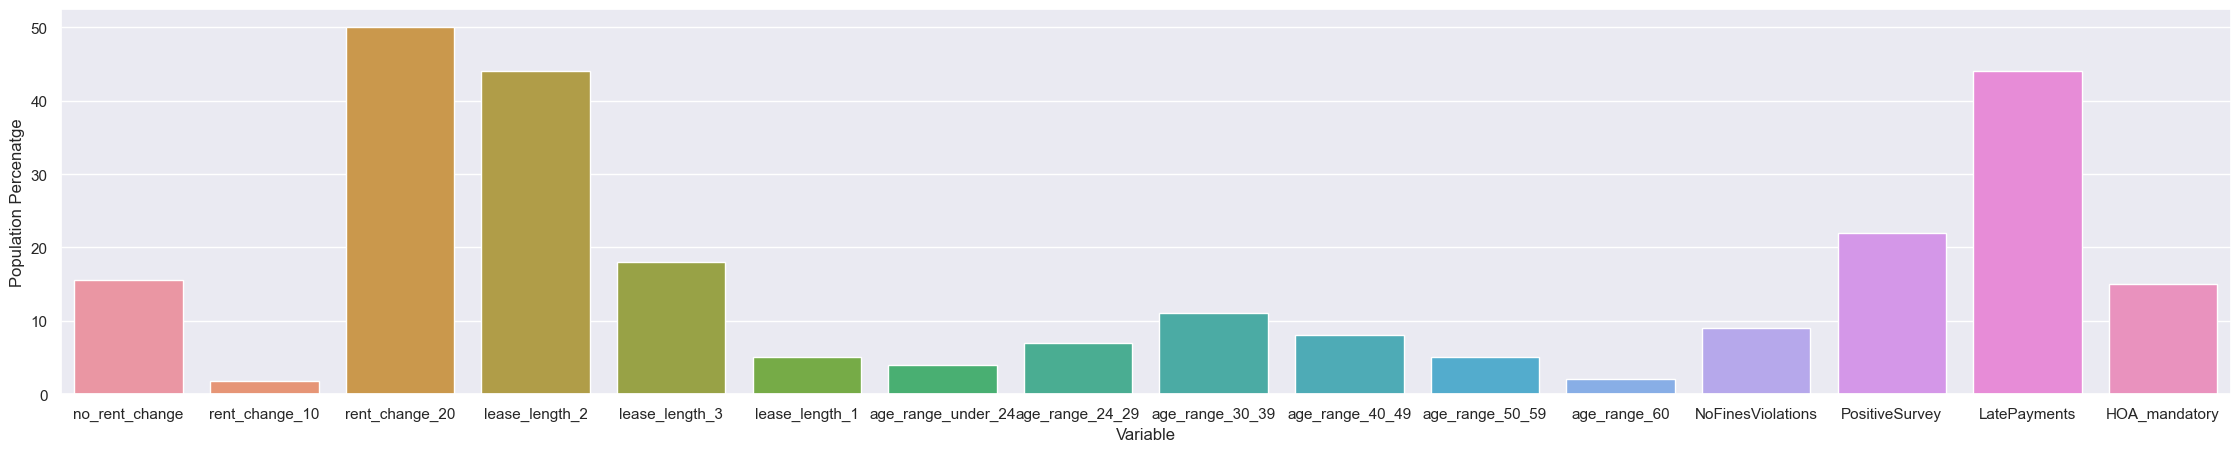

In [788]:
Variable_name= ['no_rent_change', 'rent_change_10', 'rent_change_20',
       'lease_length_2', 'lease_length_3', 'lease_length_1',
       'age_range_under_24', 'age_range_24_29', 'age_range_30_39',
       'age_range_40_49', 'age_range_50_59', 'age_range_60',
       'NoFinesViolations', 'PositiveSurvey', 'LatePayments', 'HOA_mandatory']
values=[15.54,1.74, 50, 44, 18, 5, 4, 7, 11, 8, 5, 2, 9, 22, 44, 15]
df=pd.DataFrame({'Variable': Variable_name,
     'Population Percenatge': values
    })

sns.set(rc={'figure.figsize':(28,5)})
sns.barplot(data=df, x="Variable", y="Population Percenatge")

### As, we can see the detractor variable such as :-
### lease rent was increased by 20% for the next term
### resident’s second term (they’ve renewed once before)
### resident has never been late on making payment
### the resident provided a positive feedback on the survey   
### are traits that are common in more than 25 % of population who did not renew the lease agreement. Therefore, certainly they can be explored further specifically.

## Analysis of variables causing lease renewal:- 

<AxesSubplot:xlabel='Variable', ylabel='Population Percenatge'>

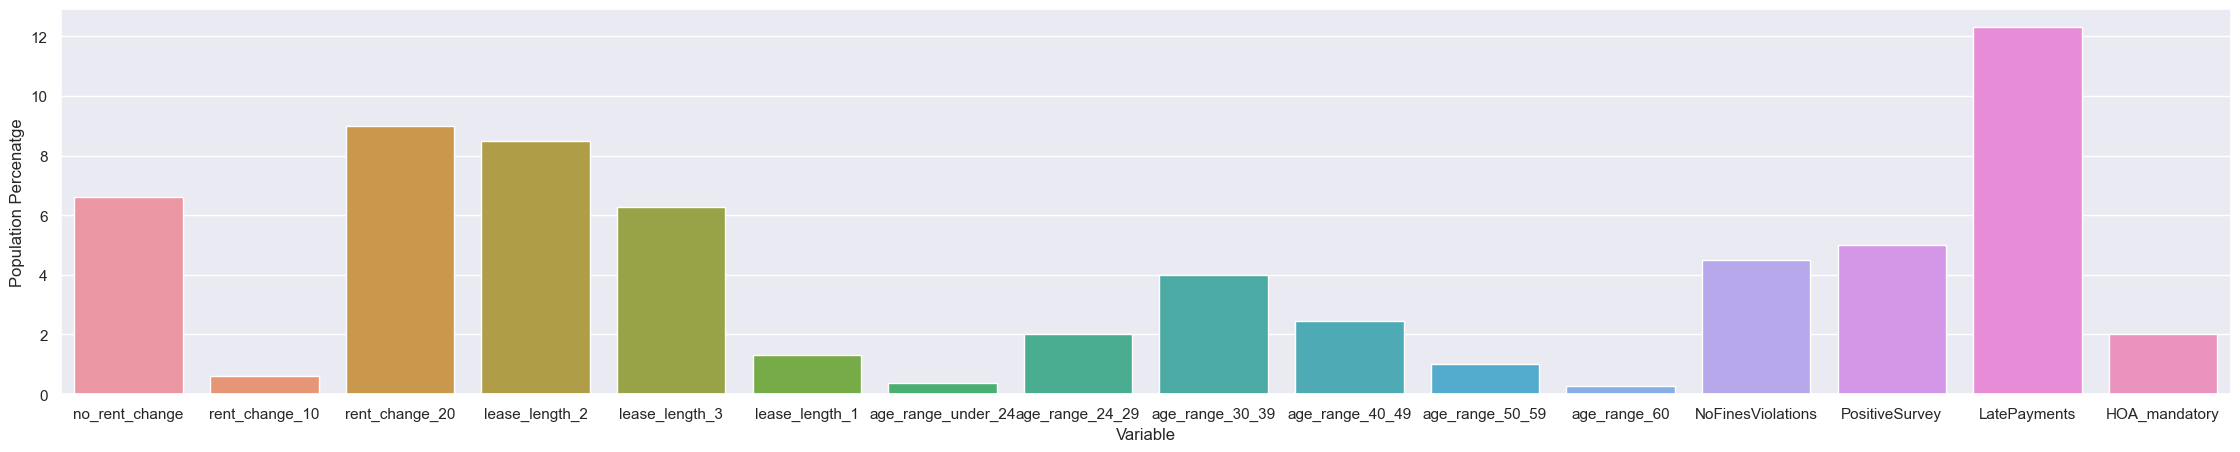

In [790]:
Variable_name= ['no_rent_change', 'rent_change_10', 'rent_change_20',
       'lease_length_2', 'lease_length_3', 'lease_length_1',
       'age_range_under_24', 'age_range_24_29', 'age_range_30_39',
       'age_range_40_49', 'age_range_50_59', 'age_range_60',
       'NoFinesViolations', 'PositiveSurvey', 'LatePayments', 'HOA_mandatory']
values=[6.6, 0.6, 9, 8.5, 6.27, 1.3, 0.36, 2, 4, 2.45, 1, 0.27, 4.5, 5, 12.3, 2]
df=pd.DataFrame({'Variable': Variable_name,
     'Population Percenatge': values
    })

sns.set(rc={'figure.figsize':(28,5)})
sns.barplot(data=df, x="Variable", y="Population Percenatge")

### If we check the given variable all of the above distribution we can infer that variables:- 
### lease rent was increased by 20% for the next term
### resident’s second term (they’ve renewed once before)
### the resident has never been late on making payments
### resident’s third term (they’ve renewed twice before)
### lease rent was not changed for the next term

### are found in more than 4 % of given population who renewed the lease. Therefore, we can asses this variables more.

## Using a ML Algorithm to see the common patterns in customer who renwed and not renewed the lease.

### I will be using KModes for creating clusters.

In [805]:
df.columns

Index(['lease_id', 'no_rent_change', 'rent_change_10', 'rent_change_20',
       'lease_length_2', 'lease_length_3', 'lease_length_1',
       'age_range_under_24', 'age_range_24_29', 'age_range_30_39',
       'age_range_40_49', 'age_range_50_59', 'age_range_60',
       'NoFinesViolations', 'PositiveSurvey', 'LatePayments', 'HOA_mandatory',
       'Renewed'],
      dtype='object')

In [809]:
## splitting the dataset in lease renewal or non renewal

df_renew=df[df["Renewed"]=='Yes']
df_not_renew=df[df["Renewed"]=='No']

df_renew=df_renew.drop(columns=['lease_id', 'Renewed'])
df_not_renew=df_not_renew.drop(columns=['lease_id', 'Renewed'])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 48393.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 48393.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 48393.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 48393.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 48393.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5403, cost: 35635.0
Run 1, iteration: 2/100, moves: 1670, cost: 35635.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4978, cost: 38236.0
Run 2, iteration:

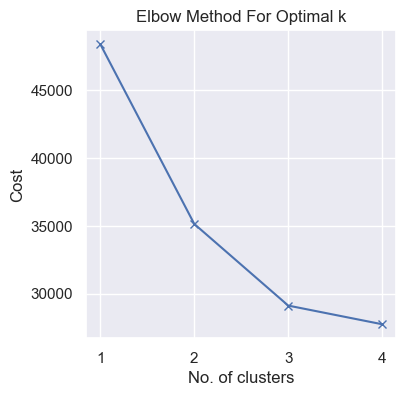

In [810]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_renew)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 180885.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 180885.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 180885.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 180885.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 180885.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7160, cost: 133473.0
Run 1, iteration: 2/100, moves: 1718, cost: 133473.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3259, cost: 163233.0
Init: ini

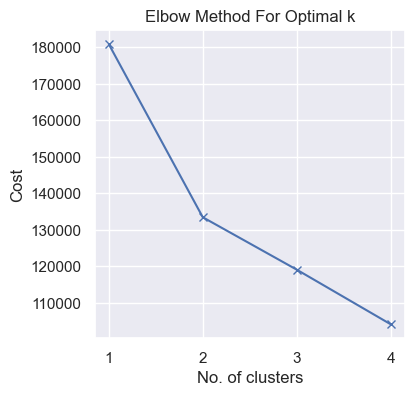

In [811]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_not_renew)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [812]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_renew)
clusters
# Finally, insert the predicted cluster values in our original dataset.

df_renew.insert(0, "Cluster", clusters, True)
df_renew

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6410, cost: 31337.0
Run 1, iteration: 2/100, moves: 656, cost: 31337.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4486, cost: 29126.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3327, cost: 31027.0
Run 3, iteration: 2/100, moves: 2294, cost: 29994.0
Run 3, iteration: 3/100, moves: 636, cost: 29994.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1964, cost: 32931.0
Run 4, iteration: 2/100, moves: 508, cost: 32931.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3727, cost: 36453.0
Run 5, iteration: 2/100, moves: 1135, cost: 36453.0
Best run was number 2


,Cluster,no_rent_change,rent_change_10,rent_change_20,lease_length_2,lease_length_3,lease_length_1,age_range_under_24,age_range_24_29,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60,NoFinesViolations,PositiveSurvey,LatePayments,HOA_mandatory
0,2,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No
30,2,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes
42,2,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No
47,2,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No
61,2,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79785,1,No,No,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No
79791,1,No,No,Yes,No,No,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No
79813,0,No,No,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No
79841,0,No,Yes,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No


In [813]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_not_renew)
clusters
# Finally, insert the predicted cluster values in our original dataset.

df_not_renew.insert(0, "Cluster", clusters, True)
df_not_renew

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1904, cost: 173437.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3091, cost: 163233.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 25818, cost: 138373.0
Run 3, iteration: 2/100, moves: 6762, cost: 138373.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 12386, cost: 163233.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4707, cost: 169277.0
Best run was number 3


,Cluster,no_rent_change,rent_change_10,rent_change_20,lease_length_2,lease_length_3,lease_length_1,age_range_under_24,age_range_24_29,age_range_30_39,age_range_40_49,age_range_50_59,age_range_60,NoFinesViolations,PositiveSurvey,LatePayments,HOA_mandatory
1,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,1,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No
3,1,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No
4,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
5,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79844,1,Yes,No,No,Yes,No,No,No,No,Yes,No,No,No,Yes,No,Yes,No
79845,0,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,No
79846,0,No,No,Yes,No,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,Yes
79847,0,No,No,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


In [827]:
df_renew_0=df_renew[df_renew['Cluster']==0]
df_renew_0=df_renew_0.drop(columns=['Cluster'])

df_renew_1=df_renew[df_renew['Cluster']==1]
df_renew_1=df_renew_1.drop(columns=['Cluster'])

df_renew_2=df_renew[df_renew['Cluster']==2]
df_renew_2=df_renew_2.drop(columns=['Cluster'])

df_not_renew_0=df_not_renew[df_not_renew['Cluster']==0]
df_not_renew_0=df_not_renew_0.drop(columns=['Cluster'])

df_not_renew_1=df_not_renew[df_not_renew['Cluster']==1]
df_not_renew_1=df_not_renew_1.drop(columns=['Cluster'])

In [836]:
## checking the cluster properties
df_list=[df_renew_0, df_renew_1, df_renew_2, df_not_renew_0, df_not_renew_0]
value=[]
for i in df_list:
    yes_percent=[]
    no_percent=[]
    for j in i.columns:
#         print(j)
        total_count=len(i)
        yes_count=len(i[i[j]=='Yes'])
        no_count=len(i[i[j]=='No'])
        yes_percentage=round(yes_count/total_count,2)*100
        no_percentage=round(no_count/total_count,2)*100
        yes_percent.append(yes_percentage)
        no_percent.append(no_percentage)
    value.append(yes_percent)
    value.append(no_percent)
#     print("_______")

In [839]:
df_renew_0_stat=pd.DataFrame({'Feature':list(df_renew_0.columns),
    'Yes %': value[0],
     'No %': value[1]
    })
df_renew_0_stat

,Feature,Yes %,No %
0,no_rent_change,79.0,21.0
1,rent_change_10,3.0,97.0
2,rent_change_20,18.0,82.0
3,lease_length_2,72.0,28.0
4,lease_length_3,10.0,90.0
5,lease_length_1,18.0,82.0
6,age_range_under_24,1.0,99.0
7,age_range_24_29,10.0,90.0
8,age_range_30_39,25.0,75.0
9,age_range_40_49,17.0,83.0


In [840]:
df_renew_1_stat=pd.DataFrame({'Feature':list(df_renew_1.columns),
    'Yes %': value[2],
     'No %': value[3]
    })
df_renew_1_stat

,Feature,Yes %,No %
0,no_rent_change,0.0,100.0
1,rent_change_10,0.0,100.0
2,rent_change_20,99.0,1.0
3,lease_length_2,0.0,100.0
4,lease_length_3,1.0,99.0
5,lease_length_1,98.0,2.0
6,age_range_under_24,3.0,97.0
7,age_range_24_29,14.0,86.0
8,age_range_30_39,22.0,78.0
9,age_range_40_49,13.0,87.0


In [841]:
df_renew_2_stat=pd.DataFrame({'Feature':list(df_renew_2.columns),
    'Yes %': value[4],
     'No %': value[5]
    })
df_renew_2_stat

,Feature,Yes %,No %
0,no_rent_change,9.0,91.0
1,rent_change_10,8.0,92.0
2,rent_change_20,14.0,86.0
3,lease_length_2,13.0,87.0
4,lease_length_3,10.0,90.0
5,lease_length_1,8.0,92.0
6,age_range_under_24,0.0,100.0
7,age_range_24_29,3.0,97.0
8,age_range_30_39,8.0,92.0
9,age_range_40_49,6.0,94.0


In [843]:
df_not_renew_0_stat=pd.DataFrame({'Feature':list(df_not_renew_0.columns),
    'Yes %': value[6],
     'No %': value[7]
    })
df_not_renew_0_stat

,Feature,Yes %,No %
0,no_rent_change,7.0,93.0
1,rent_change_10,0.0,100.0
2,rent_change_20,92.0,8.0
3,lease_length_2,16.0,84.0
4,lease_length_3,1.0,99.0
5,lease_length_1,82.0,18.0
6,age_range_under_24,6.0,94.0
7,age_range_24_29,11.0,89.0
8,age_range_30_39,15.0,85.0
9,age_range_40_49,11.0,89.0


In [844]:
df_not_renew_1_stat=pd.DataFrame({'Feature':list(df_not_renew_1.columns),
    'Yes %': value[8],
     'No %': value[9]
    })
df_not_renew_1_stat

,Feature,Yes %,No %
0,no_rent_change,7.0,93.0
1,rent_change_10,0.0,100.0
2,rent_change_20,92.0,8.0
3,lease_length_2,16.0,84.0
4,lease_length_3,1.0,99.0
5,lease_length_1,82.0,18.0
6,age_range_under_24,6.0,94.0
7,age_range_24_29,11.0,89.0
8,age_range_30_39,15.0,85.0
9,age_range_40_49,11.0,89.0


## Using above table for cluster analysis :-
### The three cluster who had renwed lease had following details:-

#### Cluster 1:-

In [848]:
df_renew_0_stat[df_renew_0_stat["Yes %"]>50.0]

,Feature,Yes %,No %
0,no_rent_change,79.0,21.0
3,lease_length_2,72.0,28.0
14,LatePayments,94.0,6.0


#### Cluster 2:-

In [849]:
df_renew_1_stat[df_renew_1_stat["Yes %"]>50.0]

,Feature,Yes %,No %
2,rent_change_20,99.0,1.0
5,lease_length_1,98.0,2.0
14,LatePayments,57.0,43.0


#### Cluster 3:-

In [854]:
df_renew_2_stat[df_renew_2_stat["Yes %"]>20.0]

,Feature,Yes %,No %
14,LatePayments,22.0,78.0


### Two cluster who had not renewed lease:- 

#### Cluster 1:-

In [856]:
df_not_renew_0_stat[df_not_renew_0_stat["Yes %"]>50]

,Feature,Yes %,No %
2,rent_change_20,92.0,8.0
5,lease_length_1,82.0,18.0
14,LatePayments,54.0,46.0


#### Cluster 2:-

In [857]:
df_not_renew_1_stat[df_not_renew_1_stat["Yes %"]>50]

,Feature,Yes %,No %
2,rent_change_20,92.0,8.0
5,lease_length_1,82.0,18.0
14,LatePayments,54.0,46.0


### Using this analysis we can derive some solid conclusion regarding customer behaviour but as all the given data is consisting of categorical variable , some numerical variable will required to make any business decision.